In [1]:
import os
import sys
import time
import math
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt

from dbn import DBN, fit_mnist_dbn
from neural_net import WarmUpMLPClassifier
from rbm import RBM, binary_data, shuffle_corpus

In [2]:
def plot_images(images, path = None, cols=3, cmap='gray'):
    rows = (len(images) + cols - 1) // cols
    fig, ax = plt.subplots(rows, cols)
    for i, image in enumerate(images):
        ax[i//cols][i%cols].imshow(image, cmap=cmap)
        ax[i//cols][i%cols].get_xaxis().set_ticks([])
        ax[i//cols][i%cols].get_yaxis().set_ticks([])
    for i in range(len(images), rows*cols):
        ax[i//cols][i%cols].get_xaxis().set_ticks([])
        ax[i//cols][i%cols].get_yaxis().set_ticks([])
        ax[i//cols][i%cols].axis('off')
    fig.set_size_inches(cols*10, rows*10)
    if path is not None:
        plt.savefig(path)
    plt.show()

# Load MNIST dataset

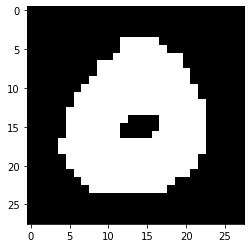

In [3]:
np.seterr(all='raise')
train_data = np.genfromtxt('./data/digitstrain.txt', delimiter=",")
train_X = train_data[:, :-1] 
train_Y = train_data[:, -1]
train_X = binary_data(train_X)

valid_data = np.genfromtxt('./data/digitsvalid.txt', delimiter=",")
valid_X = valid_data[:, :-1]
valid_X = binary_data(valid_X)
valid_Y = valid_data[:, -1]

test_data = np.genfromtxt('./data/digitstest.txt', delimiter=",")
test_X = test_data[:, :-1]
test_X = binary_data(test_X)
test_Y = test_data[:, -1]

plt.imshow(train_X[0].reshape(28, 28), cmap='gray')

# 0) Local Autograder tests

In [4]:
!pip install gradescope-utils

In [5]:
os.getcwd()

'/Users/kingtzolivares/Desktop/hw2'

In [6]:
%run tests/run_tests.py

{
    "tests": [
        {
            "name": "test (tests.gibbs_k)",
            "score": 0.0,
            "max_score": 20,
            "output": "Test Failed: 'NoneType' object cannot be interpreted as an integer\n"
        },
        {
            "name": "test (tests.h_v)",
            "score": 0.0,
            "max_score": 10,
            "output": "Test Failed: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''\n"
        },
        {
            "name": "test (tests.rec_error)",
            "score": 0.0,
            "max_score": 10,
            "output": "Test Failed: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''\n"
        },
        {
            "name": "test (tests.sample_h)",
            "score": 0.0,
            "max_score": 10,
            "output": "Test Fa

# 1) RBM Task

Two files, `rbm.py` and `dbn.py`, are provided. Only `rbm.py` will be evaluated in autograder, but you need to implement and submit both. You should read the instructions on top of these files, and the docstrings very carefully. You can change anything as you see fit in \texttt{dbn.py}, as this file will not be autograded.

We recommend you to complete and use the <span style="color:DarkOrange"> RBM.fit </span>, <span style="color:DarkOrange"> WarmUpMLPClassifier.fit </span> and <span style="color:DarkOrange"> DBN.fit </span> methods.

## a) Training RBM

Try the RBM model with gibbs steps $k$ as 1, 3, and 5. For each $k$, plot reconstruction error against the epoch number for training and validation on one plot. So you should include 3 plots here, each contains two curves for training and validation. How does $k$ affect training convergence of the model?

In [7]:
n_hidden = 100
ks = [1, 3, 5]
lr = 0.01

result = {}
rbms = {}

# Finish the training process

## b) Visualizing and understanding learned parameters

Choose one model that you like, and visualize its learned $W$ as 100 images that are 28-by-28 in pixel. Plot all of them in one figure. What are being plotted here? Do they exhibit any structure?

## c) Generation

Set $k>1000$ for this task. Display the 100 generated samples for digit images in one figure. Do they look like handwritten digits? What if you retrain your RBM on only 3 digits, say $\textbf{1, 2}$ and $\textbf{3}$? If you train with $k=1$ vs $k=5$, do you see a difference in generated figures?

## d) Conditional Generation

Only reveal the top half of MNIST images (data generation code is provided to you), and use the RBM to reconstruct the bottom half of the image. Note here when you do gibbs sampling, when you sample $\bf v$ condition on $\bf h$, part of $\bf v$ is known for sure. You need to inject these known value to the newly sampled $\bf v$.

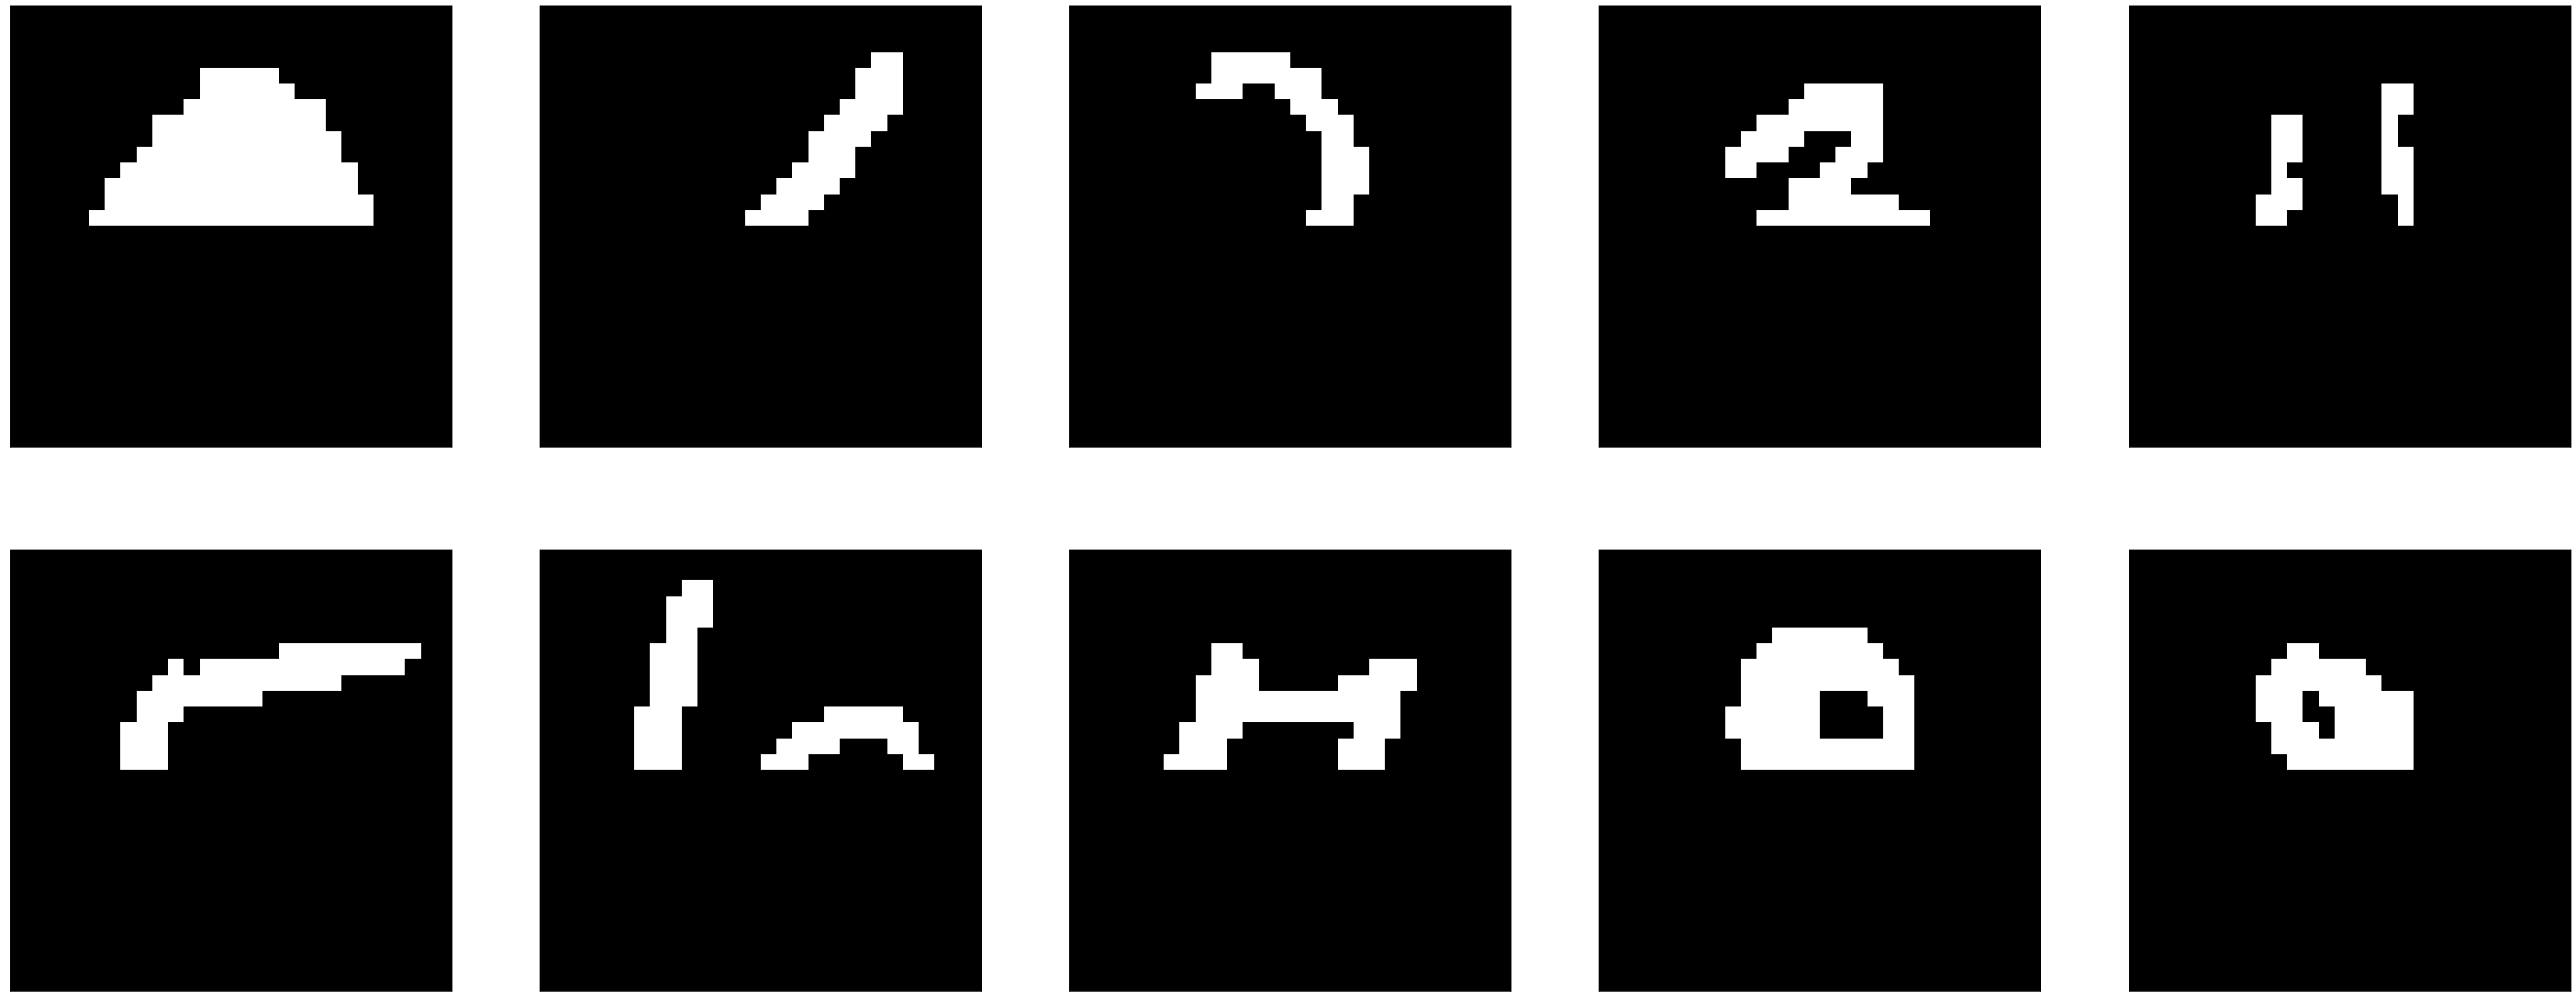

In [8]:
# ims = []
num_test = 10
mask = np.zeros((28, 28))
mask[0:14] = 1
mask_1d = mask.reshape(-1)
masked_X=[]
for i in range(num_test):
    masked_X.append(train_X[i*300])

plot_images([(x*mask_1d).reshape(28,28) for x in masked_X], path = None, cols=5, cmap='gray')

In [9]:
# Conditioned on the observed pixels, complete the rest of the image


## e) Supervised learning with RBM

Take the RBM you have trained and initialize a 2-layer neural network, of which the first layer's weights are initialized using the RBM's weight. Compare the training trajectory of this RBM-initialized network with a randomly initialized network. Does the RBM-initialized network converge faster? Plot the training loss of these two networks in one figure.

In [10]:
# rbm = RBM(n_visible=784, n_hidden=300,  k=5, lr=0.01, max_epochs=2)
# rbm.fit(X=train_X, valid_X=valid_X)
# rbm_clf = WarmUpMLPClassifier(lr=0.01, max_epochs=2, 
#                               hidden_layer_sizes=(300,),
#                               Ws=[rbm.W,], hbiases=[rbm.hbias,])
# rbm_clf.fit(train_X, train_Y)

# plt.plot(rbm_clf.loss_curve_)
# plt.show()

# 2) DBN Task

Truncate our dataset and only retain images of digits $\textbf{7}, \textbf{8}$, and $\textbf{9}$.
Build a DBN with two hidden layers with 500 and 784 units respectively, so there are two RBMs with 500 and 784 hidden units.

## a) Training DBN
Training this DBN with gibbs steps $k=3$. For each RBM, plot reconstruction error against the epoch number for training and validation on one plot. So you should include 2 plots here, each contains two curves for training and validation.

In [11]:
dbn = DBN(n_visible=784, layers=layers, 
          k=k, max_epochs=max_epochs, lr=lr)
dbn.fit(X=train_X, valid_X=valid_X)

NameError: name 'layers' is not defined

## b) Generation

Set $k>1000$ for this task. Display the 100 generated samples for digit images in one figure. Do they look like handwritten digits? 